**Problems:**     
    1- Classification : ( dog, cat --> binary classification) , ( Low, Miduim, High  --> Categorical Classification )    
    2- Regression     : predict actual value in continous range ( tempreature : 23, price : 14324 )    
    3- Clustering     : divide data ( unkown data ) into groups, why ? based on what ? how many groups ?  
    
**Clustering Algorithms**

1. Kmeans 
2. Hirarchial Clustering 
3. DB Scan


**Task:**  when to use each type of clustering ?

## Clustering With K Means

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\AI\Machine learning\dataset\income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


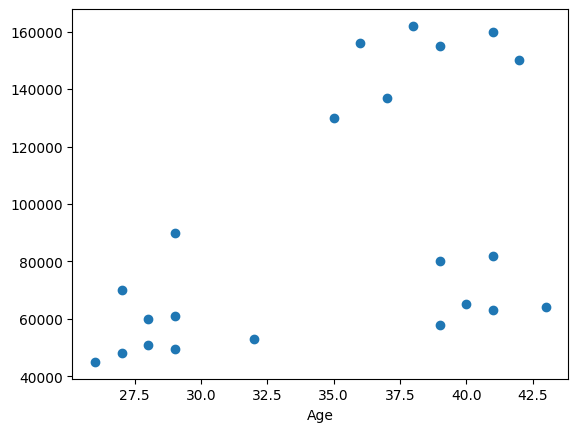

In [3]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.show()

In [4]:
final=data.drop("Name",axis=1)

In [5]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(data[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [6]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(final)

In [7]:
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [8]:
data['cluster']=y_predicted

In [9]:
data

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0


In [10]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

In [11]:
data0=data[data.cluster==0]
data1=data[data.cluster==1]
data2=data[data.cluster==2]

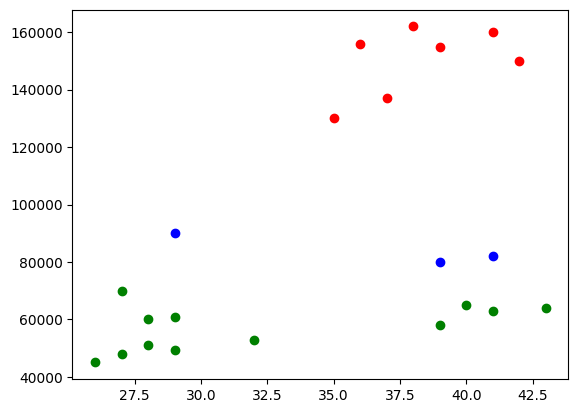

In [13]:
plt.scatter(data0.Age,data0['Income($)'],color='red')
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='blue')

In [14]:
print(data.Age.min())
print(data.Age.max())
print(data["Income($)"].min())
print(data["Income($)"].max())

26
43
45000
162000


## Preprocessing using min max scaler

In [16]:
scaler=MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)']=scaler.transform(data[['Income($)']])
scaler.fit(data[['Age']])
data['Age']=scaler.transform(data[['Age']])

In [18]:
data['Income($)'].min()

0.0

In [19]:
data['Income($)'].max()

1.0000000000000002

In [20]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


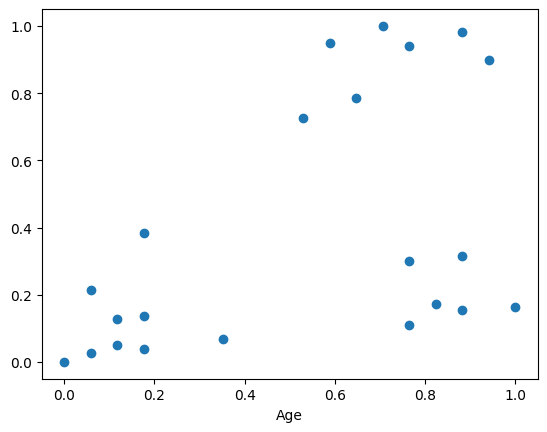

In [21]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.show()

In [22]:
final = data[['Age','Income($)']] 

In [23]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(final)
y_predicted

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0])

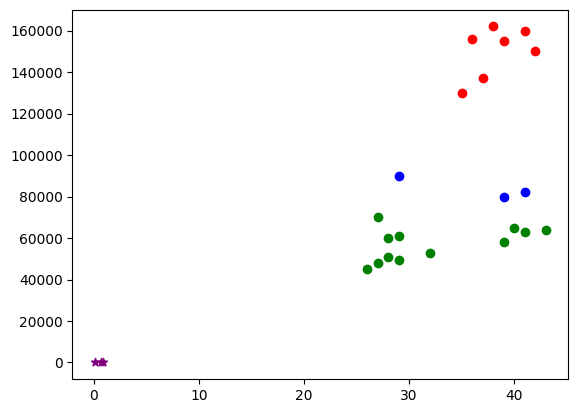

In [28]:
plt.scatter(data0.Age,data0['Income($)'],color='red')
plt.scatter(data1.Age,data1['Income($)'],color='green')
plt.scatter(data2.Age,data2['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

## How to choose the right number of clusters? Elbow Plot

In [29]:
see=[]
for i in range(2,20):
    km=KMeans(n_clusters=i)
    y_predicted=km.fit_predict(final)
    see.append(km.inertia_)

In [30]:
see

[2.091136388699078,
 0.4750783498553096,
 0.36986589192348335,
 0.28607171066894405,
 0.22020960864009398,
 0.20971143250758345,
 0.16259520162974458,
 0.10383752586603559,
 0.09420954368348863,
 0.0703872397987827,
 0.04872229430461473,
 0.04339014571765289,
 0.034947405973342734,
 0.024091449048196434,
 0.02061938744205918,
 0.017835526264237123,
 0.00897498458717514,
 0.0054551225809321684]

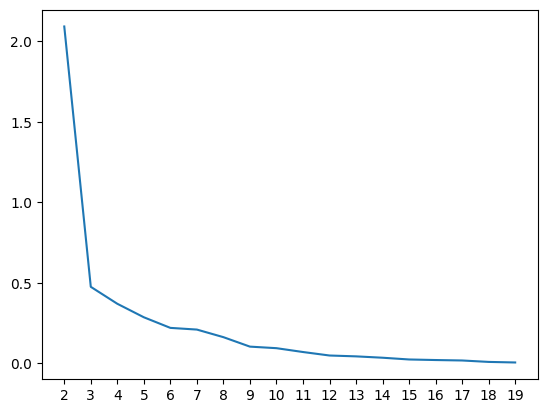

In [31]:
plt.xticks(range(2,20))
plt.plot(range(2,20),see)